# Linear Classification
* Dataset: [Breast Cancer Dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html)

In [1]:
# Import TensorFlow
import tensorflow as tf
print(tf.__version__)

2.10.0


In [2]:
# Load the breast_cancer Data from Sklearn
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()

In [3]:
# Check the type of data
type(data)

sklearn.utils._bunch.Bunch

In [4]:
# note: It is a Bunch object
# ? this Bunch basically act like a dictionary where you can treat the keys like attributes
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [5]:
# ? 'data' means input data (X)
data.data.shape

(569, 30)

In [6]:
# ? 'target' means output data (y)
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [7]:
# 'target' names
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [8]:
data.target.shape

(569,)

In [9]:
# Meaning of each feature
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [10]:
# Split dataset into train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.33)
N, D = X_train.shape

In [11]:
# Scaling the input dataset
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [12]:
# TensorFlow Model
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(D,)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the Model
r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100)

print("Train Score: ", model.evaluate(X_train, y_train))
print("Test Score: ", model.evaluate(X_test, y_test))

Epoch 1/100
12/12 [==============================] - 1s 18ms/step - loss: 1.4120 - accuracy: 0.3202 - val_loss: 1.4539 - val_accuracy: 0.3085
Epoch 2/100
12/12 [==============================] - 0s 5ms/step - loss: 1.2945 - accuracy: 0.3570 - val_loss: 1.3260 - val_accuracy: 0.3191
Epoch 3/100
12/12 [==============================] - 0s 5ms/step - loss: 1.1834 - accuracy: 0.3911 - val_loss: 1.2080 - val_accuracy: 0.3723
Epoch 4/100
12/12 [==============================] - 0s 5ms/step - loss: 1.0834 - accuracy: 0.4173 - val_loss: 1.0972 - val_accuracy: 0.4309
Epoch 5/100
12/12 [==============================] - 0s 5ms/step - loss: 0.9866 - accuracy: 0.4436 - val_loss: 0.9990 - val_accuracy: 0.4628
Epoch 6/100
12/12 [==============================] - 0s 5ms/step - loss: 0.9021 - accuracy: 0.4856 - val_loss: 0.9096 - val_accuracy: 0.5160
Epoch 7/100
12/12 [==============================] - 0s 5ms/step - loss: 0.8253 - accuracy: 0.5171 - val_loss: 0.8297 - val_accuracy: 0.5532
Epoch 8/100


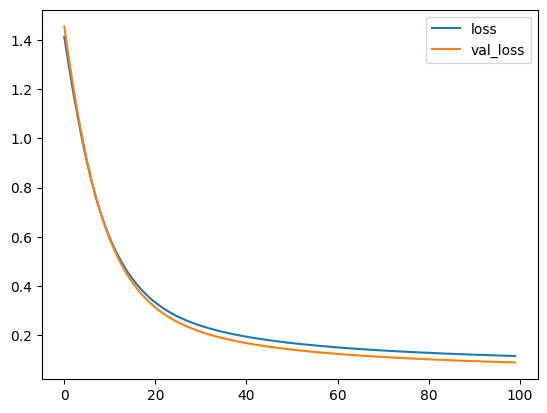

In [13]:
# Plot what's returned by model.fit()
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

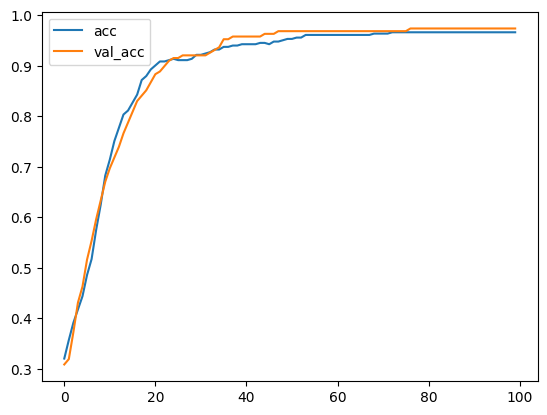

In [14]:
# Plot the accuracy of the model
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

### Making Predictions

In [15]:
# Make Predictions
# this will output the sigmoid, interpreted as probabilities p(y=1 | x)
P = model.predict(X_test)
print(P)

6/6 [==============================] - 0s 2ms/step
[[4.33894061e-03]
 [9.98652875e-01]
 [8.24048042e-01]
 [8.54170740e-01]
 [2.41739582e-03]
 [9.74060655e-01]
 [9.85868871e-01]
 [9.99355674e-01]
 [4.60864697e-03]
 [9.80241656e-01]
 [9.71314609e-01]
 [9.97294426e-01]
 [9.93554473e-01]
 [1.09483735e-04]
 [1.49812058e-01]
 [9.91724849e-01]
 [3.38745140e-03]
 [8.30124199e-01]
 [6.56749964e-01]
 [7.73061752e-01]
 [1.17846653e-02]
 [9.52856302e-01]
 [4.29232791e-02]
 [9.97421384e-01]
 [6.16443872e-01]
 [4.93481338e-01]
 [6.61887825e-01]
 [8.77738118e-01]
 [4.85244878e-02]
 [1.19976047e-03]
 [4.55261159e-07]
 [2.89824277e-01]
 [9.28456008e-01]
 [1.08557194e-01]
 [9.80140269e-01]
 [9.15540397e-01]
 [9.88273978e-01]
 [9.91384804e-01]
 [7.30413230e-05]
 [9.93157208e-01]
 [9.20045376e-01]
 [2.44297087e-03]
 [9.08213317e-01]
 [9.63901341e-01]
 [9.95982051e-01]
 [3.73773687e-02]
 [9.80622232e-01]
 [9.67905343e-01]
 [8.81445825e-01]
 [9.98969376e-01]
 [1.65203020e-01]
 [9.91052806e-01]
 [9.14600968e

In [16]:
# Round to get the actual Predictions
# ? Note: has to be flattened since the targets are size (N, ) while the predictions are size (N, 1)
import numpy as np
P = np.round(P).flatten()
print(P)

[0. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 0. 1. 1. 1. 0. 1. 0. 1.
 1. 0. 1. 1. 0. 0. 0. 0. 1. 0. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 0. 1. 1.
 1. 1. 0. 1. 1. 0. 0. 1. 0. 0. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 0. 0. 1. 0.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 1. 1. 1. 0. 0. 1. 1. 0.
 1. 0. 0. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 0. 0. 1. 1. 0. 0. 1. 0. 0. 1.
 1. 1. 1. 0. 0. 1. 0. 1. 1. 1. 1. 0. 1. 1. 0. 1. 0. 1. 0. 0. 1. 1. 1. 0.
 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 1. 0. 0. 0. 1. 0. 1. 1.
 0. 1. 0. 1. 1. 1. 0. 0. 0. 1. 0. 0. 1. 0. 1. 1. 1. 0. 0. 1.]


In [17]:
# Calculate the accuracy, compare it to evaluate() output
print("Manually calculated accuracy: ", np.mean(P == y_test))
print("Evaluate output: ", model.evaluate(X_test, y_test))

Manually calculated accuracy:  0.973404255319149
6/6 [==============================] - 0s 1ms/step - loss: 0.0905 - accuracy: 0.9734
Evaluate output:  [0.09052611142396927, 0.9734042286872864]
